In [1]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
import helper

import os
import numpy as np
from six.moves import cPickle
from tensorflow import keras
from tensorflow import keras
import helper
from tfomics import utils, metrics, explain
import logomaker
import pandas as pd

Using TensorFlow backend.


In [2]:

model_names = ['residual_bind'] #, 'task2-cnn-shallow']# deep', 'cnn-25', 'cnn-4'] #
activations = ['relu', 'exponential']#

results_path = utils.make_directory('../results', 'synthetic_code')
params_path = utils.make_directory(results_path, 'model_params')

file_path = '../data/IRF1_400_h3k27ac.h5' #ZBED2_200_h3k27ac
data = helper.load_data(file_path, reverse_compliment=True)
x_train, y_train, x_valid, y_valid, x_test, y_test = data

true_index = np.where(y_test[:,0] == 1)[0]
X = x_test[true_index][:500]

In [3]:
file_path = os.path.join(results_path, 'results_saliency_residualbind_irf1.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    

In [4]:
from tfomics import utils
plot_path = utils.make_directory(results_path, 'attr_plots_irf1')

In [5]:

plot_range = range(50,350)

scores = results['residual_bind_exponential_irf1']
scores2 = results['residual_bind_relu_irf1']

scores *= X
scores2 *= X

scores = scores[:,plot_range,:]
scores2 = scores2[:,plot_range,:]

X = X[:,plot_range,:]
N, L, A = scores.shape

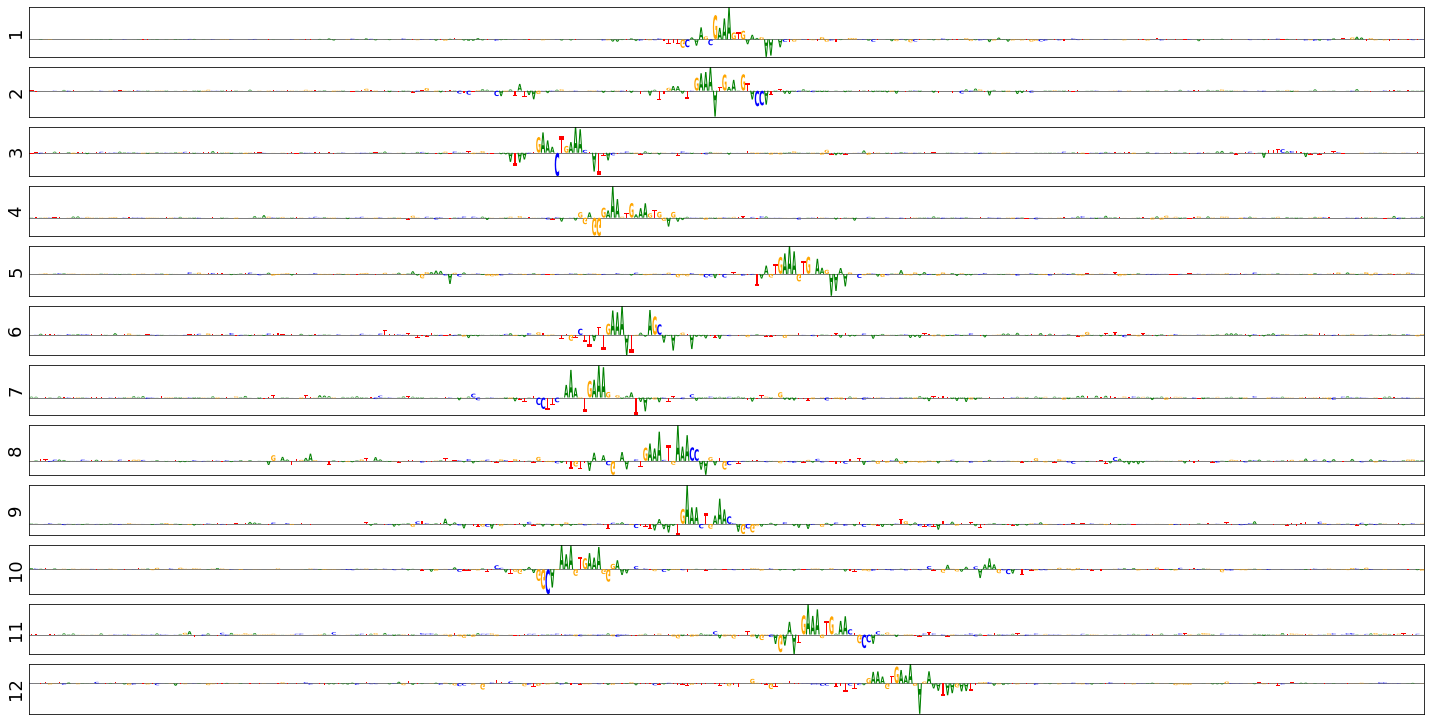

In [10]:
#plot_index = [1, 16, 18, 37, 79, 44, 53, 74, 117, 84]
plot_index = [5, 12, 40, 45, 46, 52, 56, 58, 73, 93, 95, 98]


fig = plt.figure(figsize=(25,13))
for i in range(len(plot_index)):
    

    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores2[plot_index[i],l,a]

    ax = plt.subplot(len(plot_index),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(i+1, fontsize=18)
    #plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    
outfile = os.path.join(plot_path, 'Relu_resbind_irf1.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


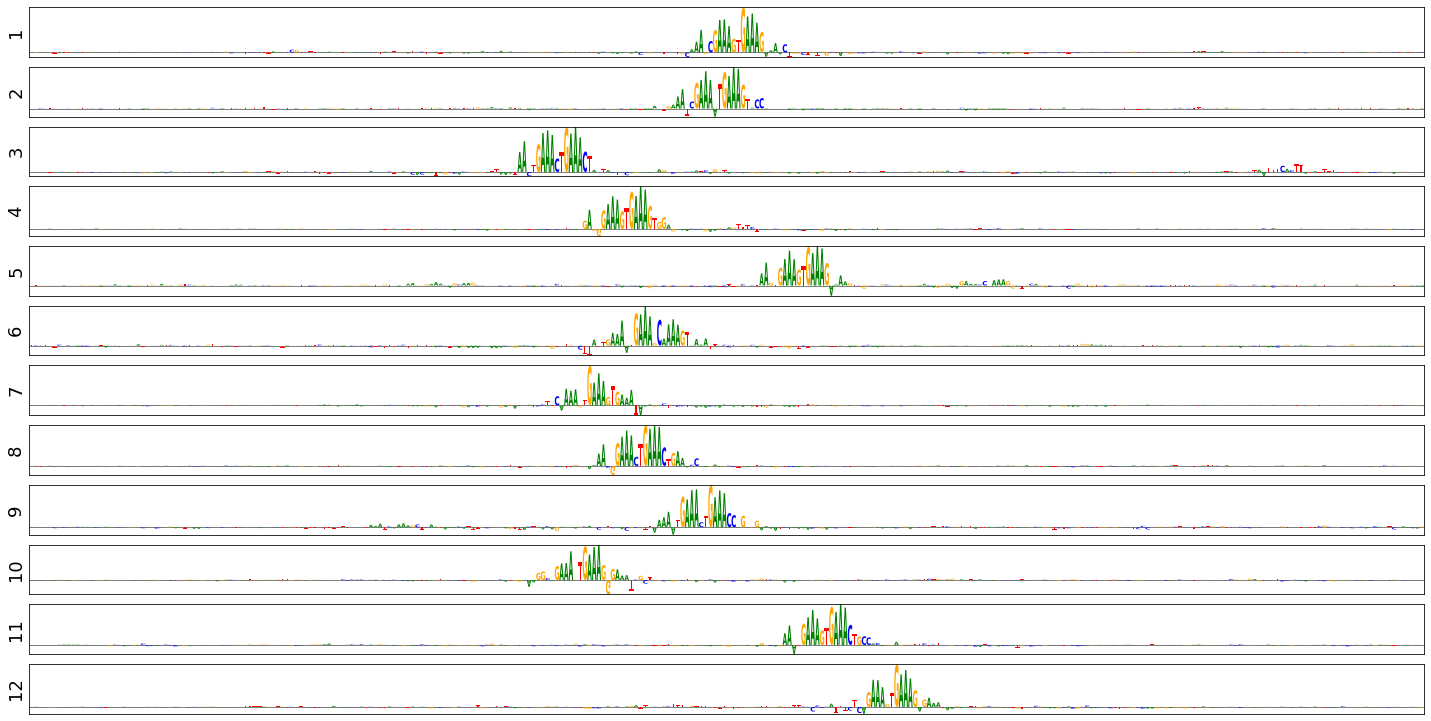

In [11]:
#plot_index = [1, 16, 18, 37, 79, 44, 53, 74, 117, 84]
plot_index = [5, 12, 40, 45, 46, 52, 56, 58, 73, 93, 95, 98]

fig = plt.figure(figsize=(25,13))
for i in range(len(plot_index)):
    
    counts_df = pd.DataFrame(data=0.0, columns=list('ACGT'), index=list(range(L)))
    for a in range(A):
        for l in range(L):
            counts_df.iloc[l,a] = scores[plot_index[i],l,a]

    ax = plt.subplot(len(plot_index),1,i+1)
    logomaker.Logo(counts_df, ax=ax)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.xticks([])
    plt.yticks([])
    fig = plt.gcf()
    plt.ylabel(i+1, fontsize=18)
    #plt.ylabel('Relu', fontsize=16)
    #ax2 = ax.twinx()
    #plt.ylabel(np.round(pr_score[k],4), fontsize=16)
    #plt.yticks([])
    
outfile = os.path.join(plot_path, 'Exp_resbind_irf1.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')
